- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 2: Supervised Learning Fundamentals
- **Due date:** N/A

# **Laboratory Exercise 1: Linear Regression Implementation**

In [1]:
#@title # **1. Data Preprocessing**
#@markdown # **Explanation:**
#@markdown - **Loading the Dataset:** The dataset is loaded into a Pandas DataFrame using **`pd.read_csv()`**.
#@markdown - **Handling Missing Values:** Missing values are checked using **`df.isnull().sum()`**. In this example, we drop rows with missing values using **`df.dropna()`**. Depending on the dataset, you may want to use imputation methods like filling with mean or median values.
#@markdown - **Normalization:**
#@markdown  - We use **`StandardScaler`** from **`sklearn.preprocessing`** to normalize the features. This standardizes the features to have a mean of 0 and a standard deviation of 1.
#@markdown  - The **`fit_transform method`** is used to scale the features, and the scaled features are then added to a new DataFrame, **`normalized_df`**, along with the target variable **`Price`**.

# Step 1: Data Preprocessing

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
path = 'datasets_house_prices.csv'  # Update this with the actual path to your dataset
df = pd.read_csv(path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values
# For simplicity, we'll drop rows with missing values.
# In practice, you may want to use imputation methods depending on the context.
df = df.dropna()

# Confirm that there are no missing values left
print("\nMissing values after handling:")
print(df.isnull().sum())

# Normalize the features
# Select features for normalization (excluding the target variable 'Price')
features = df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
target = df['Price']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the normalized features
normalized_df = pd.DataFrame(scaled_features, columns=features.columns)
normalized_df['Price'] = target.values

# Display the first few rows of the normalized DataFrame
print("\nFirst few rows of the normalized dataset:")
print(normalized_df.head())

First few rows of the dataset:
   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05

Missing values in each column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64

Missing values after handling:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64

First few rows of the normalized dataset:
   Size (sqft)  Bedrooms       Age  

In [2]:
#@title #**2. Model Implementation**
#@markdown #**Explanation:**
#@markdown - **Linear Regression Class:**
#@markdown  - **`__init__`:** Initializes the model with no coefficients or intercept.
#@markdown  - **`fit`:** Fits the model using the least squares method. Adds a column of ones to **`X`** to account for the intercept, computes the parameters (coefficients and intercept) using the normal equation, and assigns them to **`self.coef_`** and **`self.intercept_`**.
#@markdown  - **`predict`:** Predicts house prices based on input features. Uses the model’s coefficients and intercept to make predictions.
#@markdown - **Model Training:**
#@markdown  - Extracts features (**`X`**) and target variable (**`y`**) from the normalized DataFrame.
#@markdown  - Initializes an instance of the **`LinearRegression`** class, trains the model with the data, and prints the model's coefficients and intercept.
#@markdown - **Prediction Function:**
#@markdown  - **`predict_price`**: Takes a set of features, normalizes them using the same scaler as during training, and uses the model to predict the house price.
#@markdown - **Example Prediction:**
#@markdown  - Uses an example set of features to demonstrate how to use the **`predict_price`** function to get a prediction.

# Step 2: Model Implementation

import numpy as np

# Define the Linear Regression class
class LinearRegression:
    def __init__(self):
        self.coef_ = None  # Coefficients (weights) of the model
        self.intercept_ = None  # Intercept of the model

    def fit(self, X, y):
        """
        Fit the linear regression model using the least squares method.
        X: 2D array-like, shape (n_samples, n_features) - Feature matrix
        y: 1D array-like, shape (n_samples,) - Target values
        """
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add a column of ones to include the intercept in the model
        # Compute the parameters using the normal equation
        # theta = (X.T * X)^(-1) * X.T * y
        X_transpose = X.T
        theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        """
        Predict using the linear regression model.
        X: 2D array-like, shape (n_samples, n_features) - Feature matrix
        """
        return X @ self.coef_ + self.intercept_

# Extract features and target variable from the normalized DataFrame
X = normalized_df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
y = normalized_df['Price'].values

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Model Coefficients (weights):", model.coef_)
print("Model Intercept:", model.intercept_)

# Define a function to predict house prices based on input features
def predict_price(features):
    """
    Predict the house price based on input features.
    features: 1D array-like, shape (n_features,) - Input features
    """
    features = np.array(features).reshape(1, -1)
    scaled_features = scaler.transform(features)  # Normalize the input features
    return model.predict(scaled_features)[0]

# Example prediction
example_features = [3974, 1, 97, 2.032719038]  # Example features: Size (sq. ft.), Bedrooms, Age, Proximity to Downtown (miles)
predicted_price = predict_price(example_features)
print("Predicted Price for the example features:", predicted_price)


Model Coefficients (weights): [279093.75957568   6865.10416962  -5830.96824417  -8219.86434429]
Model Intercept: 719053.2124580999
Predicted Price for the example features: 1176151.1558759238


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
#@title #**3. Model Training**
#@markdown #**Explanation:**
#@markdown - **Splitting the Dataset:**
#@markdown  - **`train_test_split`**: Splits the dataset into training and testing sets. Here, 80% of the data is used for training and 20% for testing. **`random_state=42`** ensures reproducibility.
#@markdown - **Training the Model:** Initializes an instance of the **`LinearRegression`** class and fits the model on the training data.
#@markdown - **Calculating MSE:**
#@markdown  - **`predict`**: Predicts the house prices on the training data.
#@markdown  - **`mean_squared_error`**: Computes the Mean Squared Error (MSE) between the actual and predicted values on the training data to assess how well the model fits the training data.

# Step 3: Model Training

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = normalized_df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
y = normalized_df['Price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate the Mean Squared Error (MSE) on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on the training set:", mse_train)


Mean Squared Error on the training set: 102060369.47883411


Mean Squared Error on the testing set: 103564728.17767784


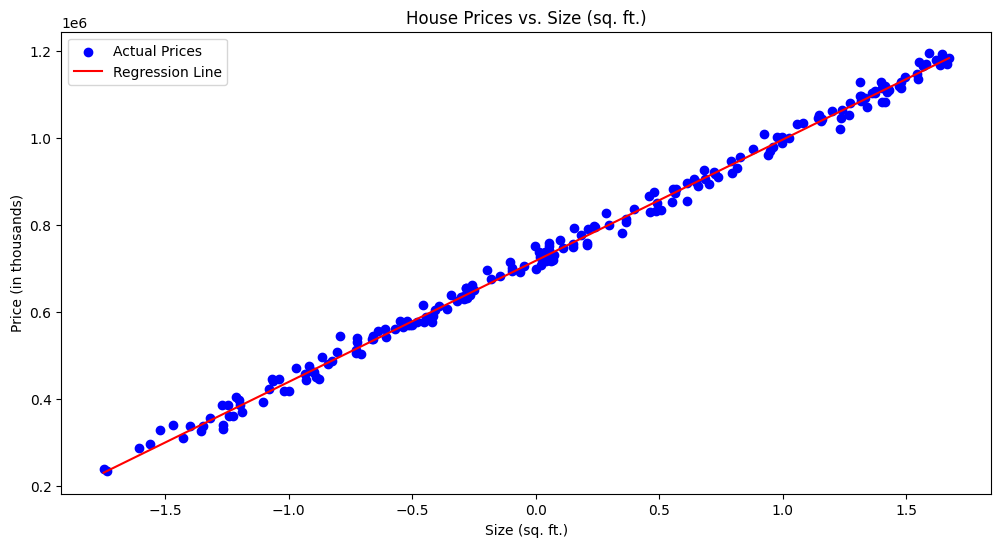

In [4]:
#@title #**4. Model Evaluation**
#@markdown #**Explanation:**
#@markdown - **Testing the Model:**
#@markdown  - **`predict`**: Predicts the house prices on the testing set.
#@markdown  - **`mean_squared_error`**: Computes the Mean Squared Error (MSE) between the actual and predicted values on the testing set to evaluate the model's performance.
#@markdown - **Plotting:**
#@markdown  - **Scatter Plot:** Shows the actual house prices versus the size of the house (in square feet) from the testing set.
#@markdown  - **Regression Line:** Plots the regression line for the feature 'Size (sq. ft.)' using predictions from the model. To keep it simple, we use the mean values of the other features (Bedrooms, Age, Proximity to Downtown) to generate predictions for the grid of 'Size (sq. ft.)' values.
#@markdown - **Visualization:**
#@markdown  - **`plt.scatter`**: Plots the actual test data points.
#@markdown  - **`plt.plot`**: Plots the regression line based on predictions for the feature of interest.


# Step 4: Model Evaluation

import matplotlib.pyplot as plt

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on the testing set:", mse_test)

# Plot the regression line along with the test data points
# To plot a regression line, we need to reduce dimensionality for visualization (e.g., use one feature vs. the target)

# For simplicity, let's use 'Size (sq. ft.)' for the plot
plt.figure(figsize=(12, 6))

# Scatter plot of test data points
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Prices')

# Create a grid of values for 'Size (sq. ft.)'
size_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100).reshape(-1, 1)

# Predict prices for the grid of 'Size (sq. ft.)' values
# Use the mean of other features for simplicity
mean_bedrooms = np.mean(X_test[:, 1])
mean_age = np.mean(X_test[:, 2])
mean_proximity = np.mean(X_test[:, 3])
grid_features = np.hstack([size_range, np.full((size_range.shape[0], 1), mean_bedrooms),
                            np.full((size_range.shape[0], 1), mean_age),
                            np.full((size_range.shape[0], 1), mean_proximity)])
predicted_prices = model.predict(grid_features)

# Plot the regression line
plt.plot(size_range, predicted_prices, color='red', label='Regression Line')

plt.xlabel('Size (sq. ft.)')
plt.ylabel('Price (in thousands)')
plt.title('House Prices vs. Size (sq. ft.)')
plt.legend()
plt.show()
